In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Entrez
import csv
from collections import defaultdict
import pytest 

In [2]:
#Register with Entrez
Entrez.email = 'taylorlynstephan@gmail.com'

In [29]:
#Define keyword, area, and range of years that you want to search on PubMed
keyword = 'HG008956'
area = 'abstract'
start_year_range = '2009'
end_year_range = '2019'

In [30]:
#Use eSearch to return PMIDs about your topic
handle = Entrez.esearch(db='pubmed', term=keyword, field = area, retmode='xml', idtype='acc', mindate=start_year_range, maxdate=end_year_range)
data = Entrez.read(handle)

In [31]:
#Use eSummary to convert PMIDs to useful information
UID = data['IdList']
print(UID)

['31636325', '31328417', '31310593', '31009165', '30988527', '30982135', '30926968', '30661772', '30655598', '30639322', '30578352', '30554721', '30504930', '30337375', '30279509', '30257206', '30240502', '30046887', '29691392', '28965761']


In [32]:
attributes_list = []

for ID in range(len(UID)):
    record = Entrez.esummary(db='pubmed', id=UID[ID])
    attributes_list.append(Entrez.read(record))

In [33]:
for attributes in attributes_list:
    for information in attributes:
        for key1, value1 in information.items():
            print(key1, value1)

Item []
Id 31636325
PubDate 2019 Oct 21
EPubDate 2019 Oct 21
Source J Hum Genet
AuthorList ['Bustamante-Marin XM', 'Shapiro A', 'Sears PR', 'Charng WL', 'Conrad DF', 'Leigh MW', 'Knowles MR', 'Ostrowski LE', 'Zariwala MA']
LastAuthor Zariwala MA
Title Identification of genetic variants in CFAP221 as a cause of primary ciliary dyskinesia.
Volume 
Issue 
Pages 
LangList ['English']
NlmUniqueID 9808008
ISSN 1434-5161
ESSN 1435-232X
PubTypeList ['Journal Article']
RecordStatus PubMed - as supplied by publisher
PubStatus aheadofprint
ArticleIds {'pubmed': ['31636325'], 'medline': [], 'doi': '10.1038/s10038-019-0686-1', 'pii': '10.1038/s10038-019-0686-1', 'rid': '31636325', 'eid': '31636325'}
DOI 10.1038/s10038-019-0686-1
History {'pubmed': ['2019/10/23 06:00'], 'medline': ['2019/10/23 06:00'], 'received': '2019/07/25 00:00', 'accepted': '2019/10/03 00:00', 'revised': '2019/10/02 00:00', 'entrez': '2019/10/23 06:00'}
References []
HasAbstract 1
PmcRefCount 0
FullJournalName Journal of human 

In [34]:
#Compile attributes to a .csv file
import csv
csv_columns = ['Item','Id','PubDate', 'EPubDate', 'Source', 'AuthorList', 'LastAuthor', 'Title', 'Volume', 'Issue', 'Pages', 'LangList', 'NlmUniqueID', 'ISSN', 'ESSN', 'PubTypeList', 'RecordStatus', 'PubStatus', 'ArticleIds', 'DOI', 'History', 'References', 'HasAbstract', 'PmcRefCount', 'FullJournalName', 'ELocationID', 'SO']
dict_data = attributes_list
csv_file = "PubMed_Output.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for info in dict_data:
            for attribute_info in info:
                writer.writerow(attribute_info)
except IOError:
    print("I/O error")

In [35]:
#Format information into a citation
citation = defaultdict(list)

for cite in attributes_list: 
    for attribute_cite in cite:
        for key, value in attribute_cite.items():
            citation[key].append(value)

print(citation['LastAuthor'])

['Zariwala MA', 'Reefhuis J', 'Ichida JK', 'Santos-Cortez RLP', 'Li B', 'Leal SM', 'Kundaje A', 'Lefebvre V', 'Lupski JR', 'Bahram S', 'Casanova JL', 'Sol-Church K', 'Eichler EE', 'Eggan K', 'Hall IM', 'State MW', 'Rehm HL', 'Uyguner ZO', 'Rivas MA', 'Eichler EE']


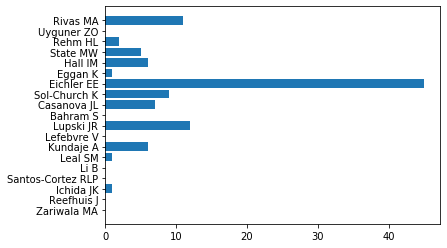

In [43]:
#Produce bar graph from citation that counts number of references per author
attribute_data_plot = plt.barh(citation['LastAuthor'], citation['PmcRefCount'])
plt.ylabel = 'Number of References'
plt.xlabel = 'Author'
plt.title = 'Number of References by Author'
plt.show()

In [63]:
citation = defaultdict(list)

for cite in attributes_list: 
    for attribute_cite in cite:
        for key, value in attribute_cite.items():
            citation[key].append(value)
print(citation['Source'])

['J Hum Genet', 'Birth Defects Res', 'JCI Insight', 'Hum Mutat', 'Nat Neurosci', 'Hum Genet', 'Nat Genet', 'Am J Hum Genet', 'Genet Med', 'Am J Hum Genet', 'Sci Immunol', 'Am J Hum Genet', 'Genet Med', 'Development', 'Nat Commun', 'Cell Rep', 'Hum Mutat', 'Hum Genet', 'Nat Commun', 'Cell']


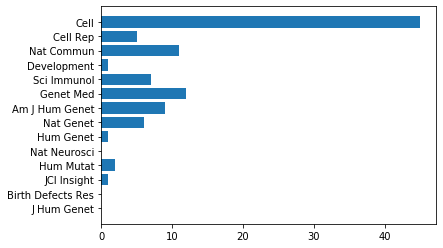

In [69]:
#Produce bar graph displaying which journals authors published in
date_data  = plt.barh(citation['Source'], citation['PmcRefCount'])
plt.ylabel = 'Journal'
plt.xlabel = 'Count'
plt.title = "How Many Publications in Each Journal for Grant U24 HG008956"
plt.show()